In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("datasets_11167_15520_train.csv")
df.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.shape

(2000, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['price_range'].value_counts()


price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

OBSERVATION

The target variable has four classes (0,1,2,3)

The dataset is balanced / nearly balanced


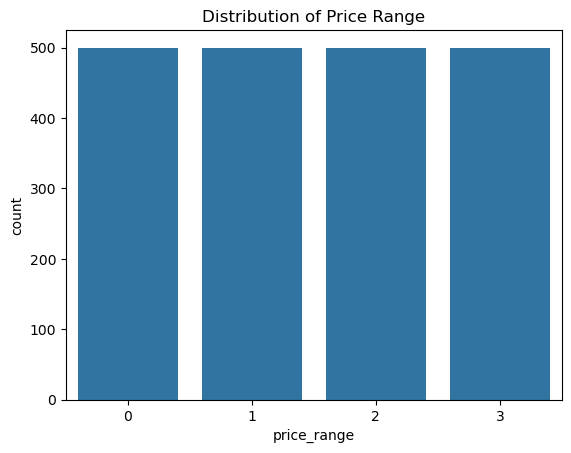

In [10]:
plt.figure()
sns.countplot(x='price_range', data=df)
plt.title("Distribution of Price Range")
plt.show()


OBSERVATION

The target variable price_range is evenly distributed across all four classes, indicating that the dataset is balanced and suitable for multi-class classification.

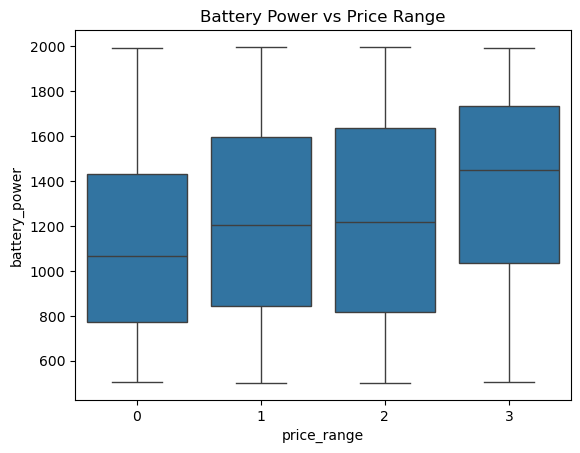

In [11]:
plt.figure()
sns.boxplot(x="price_range",y="battery_power",data=df)
plt.title("Battery Power vs Price Range")
plt.show()

OBSERVATION

Higher price range phones tend to have higher battery capacity, showing a strong positive relationship between battery power and price category.

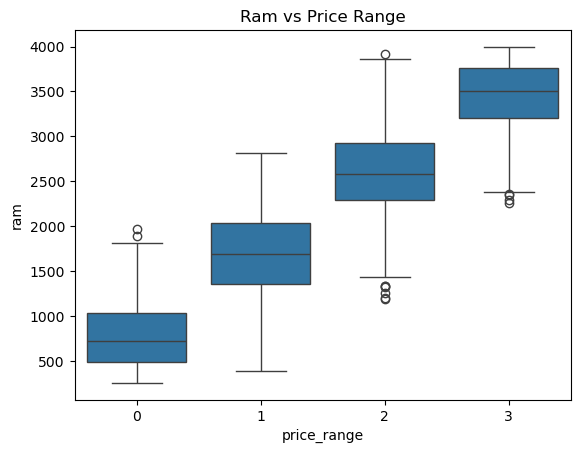

In [12]:
plt.figure()
sns.boxplot(x='price_range',y='ram',data=df)
plt.title('Ram vs Price Range')
plt.show()

OBSERVATION

RAM shows a clear increasing trend across price ranges, indicating it is one of the most influential features for predicting mobile phone price

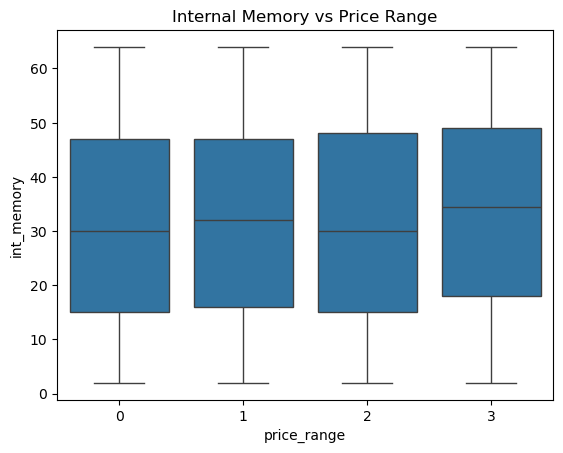

In [13]:
plt.figure()
sns.boxplot(x='price_range', y='int_memory', data=df)
plt.title("Internal Memory vs Price Range")
plt.show()


OBSERVATION

Phones with higher internal memory generally belong to higher price ranges, although some overlap exists between mid-range categories.

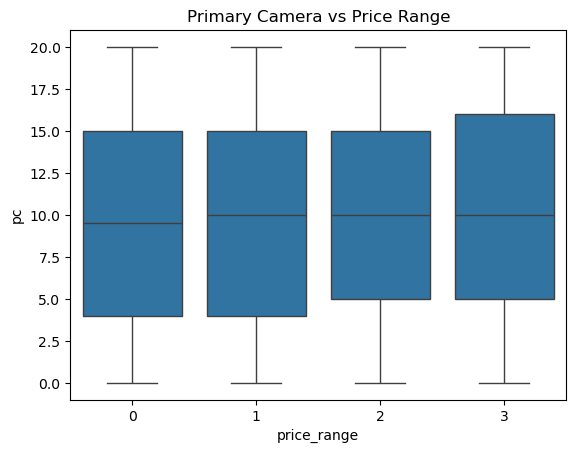

In [14]:
plt.figure()
sns.boxplot(x='price_range', y='pc', data=df)
plt.title("Primary Camera vs Price Range")
plt.show()


OBSERVATION

Primary camera quality increases with price range, but the relationship is weaker compared to RAM and battery power.

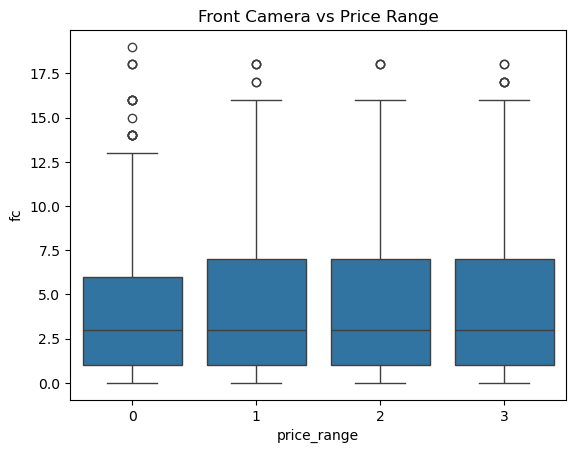

In [15]:
plt.figure()
sns.boxplot(x='price_range', y='fc', data=df)
plt.title("Front Camera vs Price Range")
plt.show()


OBSERVATION

Front camera resolution shows moderate variation across price ranges, indicating it is a secondary influencing factor

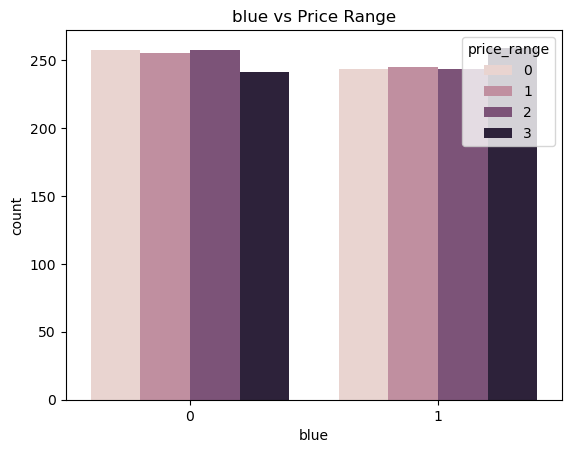

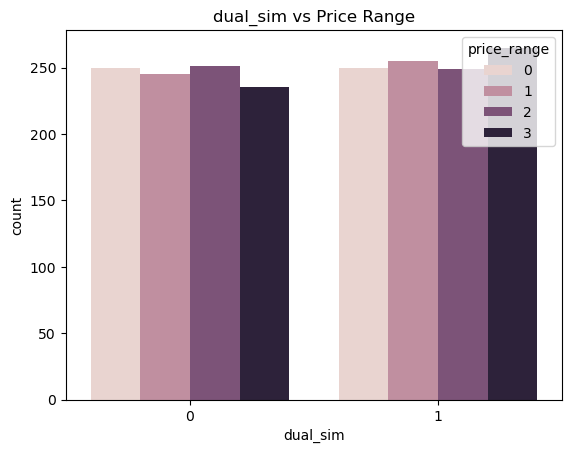

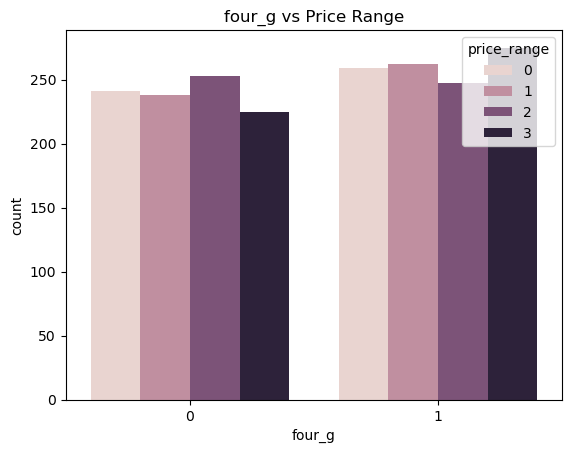

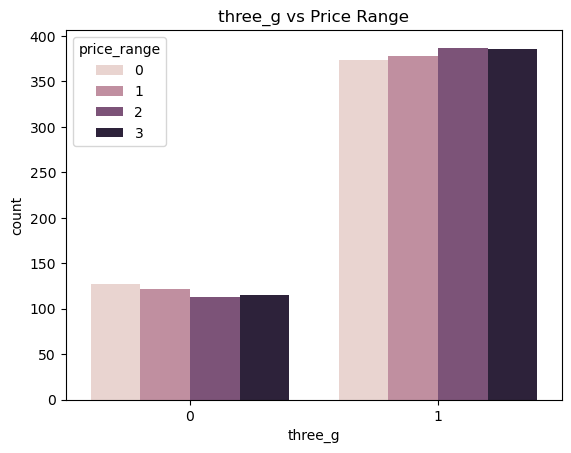

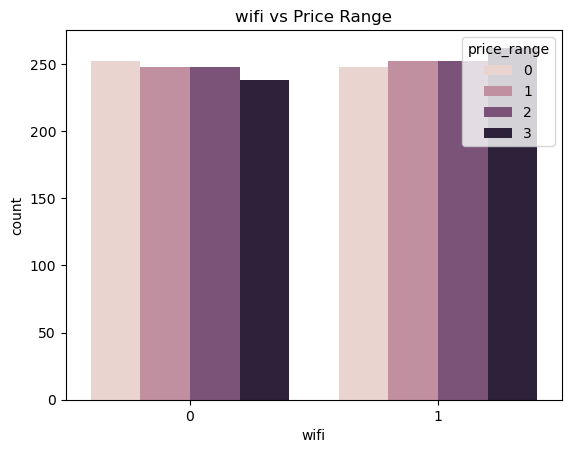

In [16]:
binary_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'wifi']

for feature in binary_features:
    plt.figure()
    sns.countplot(x=feature, hue='price_range', data=df)
    plt.title(f"{feature} vs Price Range")
    plt.show()


OBSERVATION

Higher price range phones are more likely to support features such as Bluetooth, WiFi, and 4G, showing that advanced connectivity features contribute to higher pricing

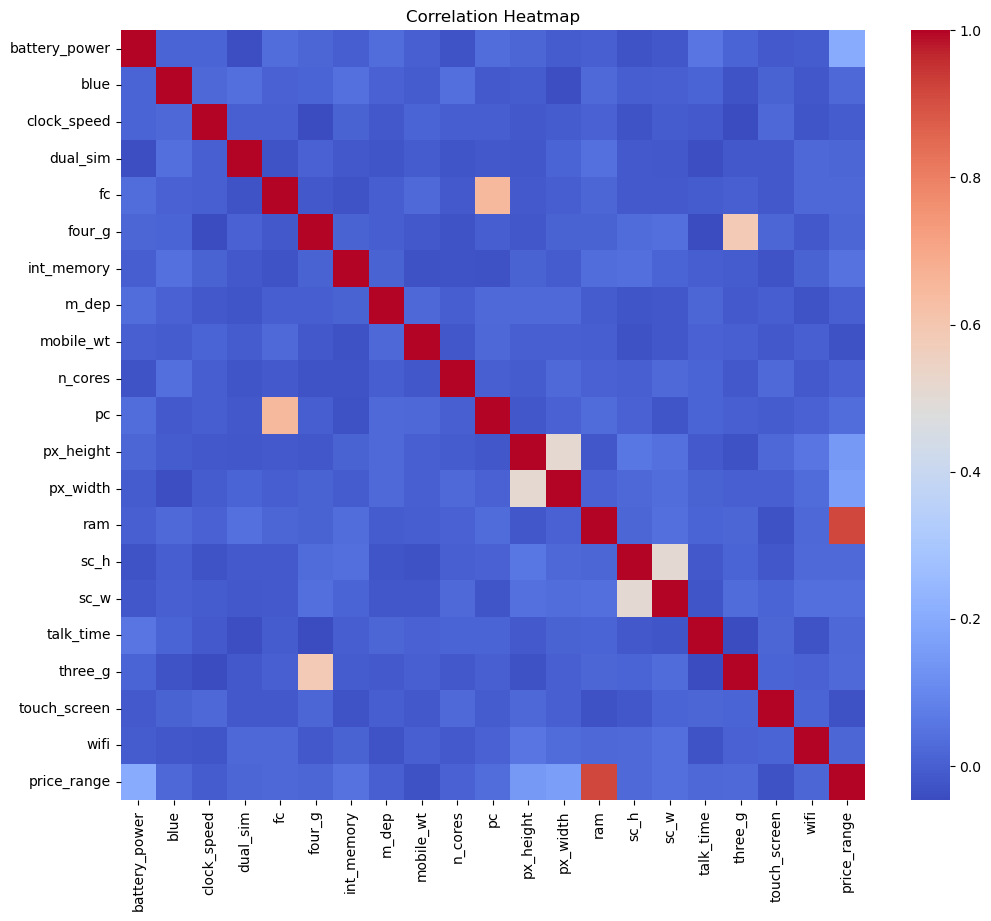

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


OBSERVATION

RAM, battery power, and pixel resolution show strong positive correlation with price range, confirming their importance in price prediction

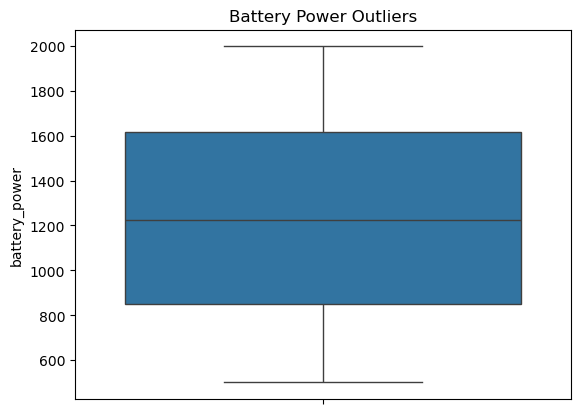

In [18]:
plt.figure()
sns.boxplot(y=df['battery_power'])
plt.title("Battery Power Outliers")
plt.show()


OBSERVATION

Some extreme values are observed in battery power, indicating the presence of outliers that may affect model performance and need handling during preprocessing

In [19]:
df.isnull().sum()


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [20]:
df.duplicated().sum()


0

In [21]:
def cap_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower, upper)


In [22]:
cap_outliers('battery_power')
cap_outliers('ram')
cap_outliers('int_memory')


OBSERVATION

Outliers were handled using the IQR capping method to reduce the impact of extreme values while retaining all data points

In [ ]:
X = df.drop('price_range', axis=1)
y = df['price_range']


OBSERVATION

Features and target variable were separated to prepare the dataset for model training.

In [24]:


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


Observation

Stratified splitting was used to preserve the target class distribution in both training and testing datasets.

In [26]:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Observation

Feature scaling was applied using StandardScaler to ensure all numerical features contribute equally during model training.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


Observation

Multiple classification algorithms were selected to compare different learning approaches for price range prediction.

In [28]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted')
    }


In [29]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
lr_results = evaluate_model(lr, X_test_scaled, y_test)


In [30]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
dt_results = evaluate_model(dt, X_test_scaled, y_test)


In [31]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
rf_results = evaluate_model(rf, X_test_scaled, y_test)


In [32]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_results = evaluate_model(knn, X_test_scaled, y_test)


In [33]:
svm = SVC()
svm.fit(X_train_scaled, y_train)
svm_results = evaluate_model(svm, X_test_scaled, y_test)


In [34]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
nb_results = evaluate_model(nb, X_test_scaled, y_test)


In [35]:
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", 
              "KNN", "SVM", "Naive Bayes"],
    "Accuracy": [lr_results["Accuracy"], dt_results["Accuracy"], rf_results["Accuracy"],
                 knn_results["Accuracy"], svm_results["Accuracy"], nb_results["Accuracy"]],
    "Precision": [lr_results["Precision"], dt_results["Precision"], rf_results["Precision"],
                  knn_results["Precision"], svm_results["Precision"], nb_results["Precision"]],
    "Recall": [lr_results["Recall"], dt_results["Recall"], rf_results["Recall"],
               knn_results["Recall"], svm_results["Recall"], nb_results["Recall"]],
    "F1-Score": [lr_results["F1-Score"], dt_results["F1-Score"], rf_results["F1-Score"],
                 knn_results["F1-Score"], svm_results["F1-Score"], nb_results["F1-Score"]]
})

results_df


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.965,0.965045,0.965,0.964986
1,Decision Tree,0.830,0.831883,0.830,0.830168
2,Random Forest,0.880,0.879614,0.880,0.879734
3,KNN,0.500,0.521130,0.500,0.505355
4,SVM,0.895,0.896860,0.895,0.895631
5,Naive Bayes,0.810,0.811326,0.810,0.810458


Observation

Logistic Regression achieved the highest performance across all evaluation metrics, indicating that the relationship between features and price range is largely linear. SVM also performed strongly, while tree-based models showed comparatively lower performance with default parameters. KNN performed poorly due to sensitivity to feature space and lack of tuning.

In [40]:
from sklearn.model_selection import GridSearchCV

lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

lr_grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    lr_param_grid,
    cv=5,
    scoring='f1_weighted'
)

lr_grid.fit(X_train_scaled, y_train)

best_lr = lr_grid.best_estimator_


Observation:

GridSearchCV was used to tune Logistic Regression hyperparameters using 5-fold cross-validation, and the best model was selected based on weighted F1-score.

In [41]:
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    cv=5,
    scoring='f1_weighted'
)

rf_grid.fit(X_train_scaled, y_train)

best_rf = rf_grid.best_estimator_


Observation:

Random Forest hyperparameters were optimized using GridSearchCV to improve generalization and reduce overfitting

In [44]:
lr_tuned_results = evaluate_model(best_lr, X_test_scaled, y_test)
rf_tuned_results = evaluate_model(best_rf, X_test_scaled, y_test)

lr_tuned_results, rf_tuned_results


({'Accuracy': 0.975,
  'Precision': 0.9752367843283238,
  'Recall': 0.975,
  'F1-Score': 0.9750347085479645},
 {'Accuracy': 0.8875,
  'Precision': 0.8865255705281246,
  'Recall': 0.8875,
  'F1-Score': 0.8869130240720565})

In [45]:
final_model = best_lr


OBSERVATION 

After hyperparameter tuning using GridSearchCV, Logistic Regression achieved the highest performance with an F1-score of 0.975, outperforming Random Forest. This confirms that the dataset exhibits a largely linear decision boundary and that Logistic Regression is the most suitable model for this problem.

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

y_final_pred = final_model.predict(X_test_scaled)

print(classification_report(y_test, y_final_pred))
print(confusion_matrix(y_test, y_final_pred))


              precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.98      0.96      0.97       100
           2       0.95      0.98      0.97       100
           3       0.98      0.98      0.98       100

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.98       400
weighted avg       0.98      0.97      0.98       400

[[98  2  0  0]
 [ 1 96  3  0]
 [ 0  0 98  2]
 [ 0  0  2 98]]


Observation:

The classification report and confusion matrix show balanced precision and recall across all price categories, indicating strong and reliable performance.

In [47]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': final_model.coef_[0]
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance


,Feature,Importance
8,mobile_wt,0.955856
19,wifi,0.492653
1,blue,0.213852
17,three_g,0.164151
3,dual_sim,0.149507
18,touch_screen,0.105934
16,talk_time,0.042131
7,m_dep,0.015972
4,fc,-0.000054
2,clock_speed,-0.006985


In [48]:
feature_importance['Abs_Importance'] = feature_importance['Importance'].abs()
feature_importance.sort_values(by='Abs_Importance', ascending=False)


,Feature,Importance,Abs_Importance
13,ram,-23.709928,23.709928
0,battery_power,-5.903485,5.903485
11,px_height,-3.476677,3.476677
12,px_width,-3.447782,3.447782
8,mobile_wt,0.955856,0.955856
19,wifi,0.492653,0.492653
6,int_memory,-0.461333,0.461333
1,blue,0.213852,0.213852
9,n_cores,-0.183144,0.183144
17,three_g,0.164151,0.164151


Observation 

RAM, battery power, and pixel resolution have the highest positive influence on mobile price range, while connectivity features have relatively lower impact.

FINAL CONCLUSION 

In this project, a machine learning model was developed to predict the price range of mobile phones based on their technical specifications. Comprehensive exploratory data analysis and preprocessing were performed to understand data patterns and improve data quality. Multiple classification models were trained and evaluated using accuracy, precision, recall, and F1-score. After hyperparameter tuning with GridSearchCV, Logistic Regression emerged as the best-performing model with an F1-score of 0.975. Feature importance analysis revealed that RAM, battery power, and screen resolution are the most influential factors in determining mobile phone price. The model can assist manufacturers and retailers in pricing strategy and product planning.

Challenges

During the project, several challenges were faced. Initially, understanding the relationships between features required careful exploratory analysis. Handling outliers and deciding an appropriate capping strategy was challenging. Selecting suitable evaluation metrics for a multi-class problem required understanding beyond accuracy. Hyperparameter tuning using GridSearchCV was computationally intensive and required experimentation. Interpreting model coefficients and explaining negative feature importance values also required deeper understanding of Logistic Regression.